<a href="https://colab.research.google.com/github/Cris-0506/Cris-0506/blob/main/Enem_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Projeto Enem 2021 / Dados disponíveis no site do Inep (http://inep.gov.br/microdados).


Análise de desempenho na nota de redação entre homens e mulheres na prova do Enem 2021.

In [9]:
import pandas as pd
import numpy as np

In [10]:
dados = pd.read_csv('/content/MICRODADOS_ENEM_2021.csv', sep=';', encoding = 'iso-8859-1')

In [11]:
np.random.seed(1)

In [12]:
amostragem = dados.sample(30000)

In [13]:
amostragem.shape

(30000, 76)

In [ ]:
# Analisando as variáveis do dataframe.
amostragem.columns.values

In [15]:
# Filtrando as colunas que serão utilizadas.
seleçao = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO','IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC','CO_UF_ESC','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4', 'NU_NOTA_COMP5','NU_NOTA_REDACAO']
       

In [16]:
dados_enem = amostragem.filter(items=seleçao)

In [17]:
dados_enem.head(30)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
11516,210053057367,2021,11,M,1,4,1,4,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,210052699486,2021,3,F,1,1,1,2,0,2,...,441.9,469.4,500.1,506.5,120.0,160.0,100.0,120.0,120.0,620.0
1609,210053024840,2021,12,F,2,5,1,1,14,1,...,464.8,590.1,491.6,468.8,120.0,80.0,60.0,100.0,40.0,400.0
40738,210054114732,2021,2,M,1,3,1,2,0,2,...,422.5,365.4,468.7,442.3,120.0,100.0,80.0,100.0,120.0,520.0
42783,210051244423,2021,11,F,1,3,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6805,210051243724,2021,2,M,1,2,1,3,0,1,...,528.3,461.7,513.3,509.7,100.0,200.0,120.0,100.0,100.0,620.0
33102,210054178191,2021,6,F,1,3,1,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45383,210052788477,2021,3,M,1,3,1,2,0,2,...,398.7,549.3,505.0,539.8,100.0,160.0,100.0,120.0,120.0,600.0
29621,210053444036,2021,2,F,1,3,1,2,0,2,...,470.7,482.4,462.9,555.0,120.0,160.0,120.0,180.0,160.0,740.0
22539,210051804271,2021,3,F,1,3,1,2,0,2,...,678.7,704.2,661.7,748.9,160.0,200.0,160.0,160.0,160.0,840.0


In [18]:
dados_sexo = dados_enem ['TP_SEXO']

In [19]:
dados_sexo.value_counts()

F    21137
M     8863
Name: TP_SEXO, dtype: int64

In [20]:
# Renomeando registros da faixa etária.
dados_enem['TP_FAIXA_ETARIA'] = dados_enem['TP_FAIXA_ETARIA'].replace({1:'Menor de 17', 2:17, 3:18, 4:19, 5:20, 6:21,7:22, 8:23, 9:24, 10:25, 11:'Entre 26 e 30', 12: 'Entre 31 e 35', 13: 'Entre 36 e 40', 14: 'Entre 41 e 45', 15: 'Entre 46 e 50', 16: 'Entre 51 e 55', 17:'Entre 56 e 60', 18: 'Entre 61 e 65', 19: 'Entre 66 e 70', 20: 'Maior de 70' })

In [21]:
dados_faixa_etaria = dados_enem ['TP_FAIXA_ETARIA']

In [22]:
dados_faixa_etaria.value_counts()

18               8026
17               6751
19               3870
20               2304
Menor de 17      1652
21               1516
Entre 26 e 30    1356
22                893
Entre 31 e 35     753
23                638
24                566
Entre 36 e 40     546
25                425
Entre 41 e 45     311
Entre 46 e 50     186
Entre 51 e 55     126
Entre 56 e 60      58
Entre 61 e 65      14
Entre 66 e 70       5
Maior de 70         4
Name: TP_FAIXA_ETARIA, dtype: int64

In [23]:
dados_enem['TP_ESTADO_CIVIL'] = dados_enem['TP_ESTADO_CIVIL']. replace ({0: 'Não informado', 1: 'Solteiro(a)', 2: 'Casado(a)', 3: 'Divorciado(a)/Separado(a)', 4: 'Viúvo(a)'})

In [24]:
# Criando uma variável que contém somente os candidatos que compareceram a prova e não foram desclassificados.
candidatos = dados_enem.loc[dados_enem.TP_PRESENCA_CH == 1]

In [25]:
# A análise será feita utilizando somente os dados dos vestibulandos classificados. As provas LC, CH e redação foram feitas no mesmo dia, CN e MT em outro dia.
# Assim, o aluno perde mais de uma prova caso falte um dia.
# Registros: 0 = Faltou  à prova; 1 = Presente na prova; 2 = Eliminado na prova.



In [26]:
candidatos = candidatos.loc[candidatos.TP_PRESENCA_MT == 1]

In [27]:
dados_estado_civil = candidatos['TP_ESTADO_CIVIL']

In [28]:
dados_estado_civil.value_counts()

Solteiro(a)                  21895
Casado(a)                      681
Não informado                  668
Divorciado(a)/Separado(a)      242
Viúvo(a)                        13
Name: TP_ESTADO_CIVIL, dtype: int64

In [29]:
dados_mulheres = candidatos.loc[candidatos.TP_SEXO == 'F']

In [30]:
dados_mulheres.shape

(16680, 29)

In [31]:
dados_homens = candidatos[candidatos.TP_SEXO == 'M']

In [32]:
dados_homens.shape

(6819, 29)

In [33]:
# Retirando amostras de 3000 homens e 3000 mulheres para melhorar a robustez do teste de normalidade.
amostra_mulheres = dados_mulheres.sample(3000)

In [34]:
amostra_homens = dados_homens.sample(3000)

1. Objetivo: Analisar se há diferença de desempenho entre homens e mulheres na nota de redação.


*   H0 = Não existe diferença (p>0,05).
*   Ha = Existe diferença (p<=0,05).



In [35]:
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [36]:
# Analisando Normalidade com teste de Shapiro-Wilk. (p>0,05)
stats.shapiro(amostra_mulheres.NU_NOTA_REDACAO)

ShapiroResult(statistic=0.9464705586433411, pvalue=1.0187863777277264e-31)

In [37]:
stats.shapiro(amostra_homens.NU_NOTA_REDACAO)

ShapiroResult(statistic=0.9393039345741272, pvalue=2.145908651122257e-33)

In [38]:
# A distribuição das notas de redação de homens e mulheres não é normal, dessa forma será necessário um teste não paramétrico.
# Observação dos dados nos gráficos QQ Plot e histograma.

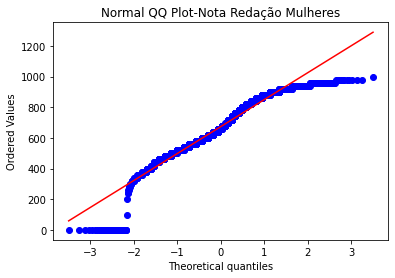

In [39]:
stats.probplot(amostra_mulheres['NU_NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('Normal QQ Plot-Nota Redação Mulheres')
plt.show()

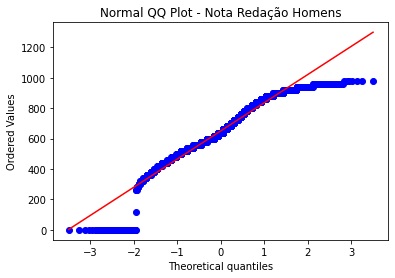

In [40]:
stats.probplot(amostra_homens['NU_NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('Normal QQ Plot - Nota Redação Homens')
plt.show()

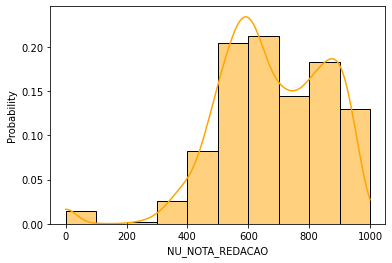

In [41]:
sns.histplot(amostra_mulheres, x='NU_NOTA_REDACAO', bins=10, color='orange', kde=True, stat='probability')

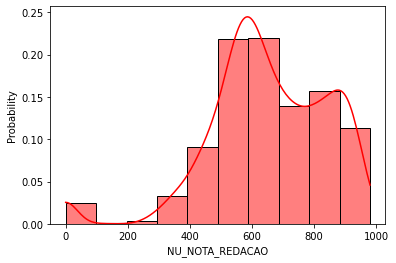

In [42]:
sns.histplot(amostra_homens, x='NU_NOTA_REDACAO', bins=10, color= 'red', kde=True, stat='probability')

In [43]:
stat, p=stats.mannwhitneyu(amostra_mulheres.NU_NOTA_REDACAO, amostra_homens.NU_NOTA_REDACAO)
print('Estatística do Teste: {}'.format(stat.round(2)))
print('p-valor:{}'.format(p))

Estatística do Teste: 4796493.5
p-valor:9.754372085408898e-06


In [44]:
amostra_mulheres.describe()

,NU_INSCRICAO,NU_ANO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,3.000000e+03,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,1376.000000,3000.000000,7.640000e+02,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.100528e+11,2021.0,2.117000,1.026333,1.691667,1.397333,1.513333,1.007267,0.111000,3.188922e+06,...,484.331033,523.244067,504.426500,525.385700,127.380000,151.986667,125.400000,139.653333,129.946667,674.366667
std,1.010784e+06,0.0,1.010108,0.170244,0.665892,2.910146,0.587597,0.084970,0.314185,1.035844e+06,...,79.335048,93.693517,77.772769,107.211717,30.196681,43.017865,34.741555,37.221073,58.310066,180.391554
min,2.100510e+11,2021.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100114e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.100519e+11,2021.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.309879e+06,...,426.100000,451.725000,450.075000,440.500000,120.000000,120.000000,100.000000,120.000000,100.000000,560.000000
50%,2.100528e+11,2021.0,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,3.106200e+06,...,471.450000,524.550000,507.800000,504.300000,120.000000,160.000000,120.000000,140.000000,140.000000,660.000000
75%,2.100537e+11,2021.0,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,3.550308e+06,...,530.700000,587.525000,556.600000,596.300000,160.000000,200.000000,140.000000,160.000000,180.000000,820.000000
max,2.100545e+11,2021.0,5.000000,4.000000,4.000000,15.000000,3.000000,2.000000,1.000000,5.300108e+06,...,765.900000,832.500000,721.500000,944.100000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


In [45]:
amostra_homens.describe()

,NU_INSCRICAO,NU_ANO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,3.000000e+03,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,1365.000000,3000.000000,9.380000e+02,...,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.100527e+11,2021.0,2.069667,1.017333,1.667667,2.023000,1.533000,1.006593,0.096667,3.169180e+06,...,509.72320,544.601333,514.024833,560.433800,121.986667,146.153333,120.893333,135.733333,126.293333,651.060000
std,9.972752e+05,0.0,1.016772,0.179936,0.659823,3.946094,0.621589,0.080961,0.295553,1.072061e+06,...,87.09455,100.149529,81.000307,122.252416,32.906141,45.907577,36.833692,39.360454,59.340552,190.672656
min,2.100510e+11,2021.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100122e+06,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.100519e+11,2021.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.307776e+06,...,442.37500,468.250000,457.450000,457.450000,100.000000,120.000000,100.000000,120.000000,100.000000,540.000000
50%,2.100527e+11,2021.0,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.927808e+06,...,502.95000,549.700000,519.100000,545.800000,120.000000,120.000000,120.000000,120.000000,140.000000,640.000000
75%,2.100536e+11,2021.0,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,3.550308e+06,...,569.80000,615.750000,571.850000,652.900000,140.000000,200.000000,140.000000,160.000000,180.000000,800.000000
max,2.100545e+11,2021.0,5.000000,4.000000,4.000000,15.000000,3.000000,2.000000,1.000000,5.300108e+06,...,806.90000,814.300000,734.400000,953.100000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


Conclusão: Considerando o intervalo de confiança de 95%, podemos concluir que existe diferença entre as medianas das notas de redação entre homens e mulheres. Rejeita H0. O desempenho das mulheres na prova de redação foi superior ao dos homens.


*   Mediana nota mulheres = 620
*   Mediana nota homens = 600



2. Objetivo: Analisar se há diferença de desempenho entre mulheres casadas e homens casados na nota de redação.


*   H0 = Não há diferença (p>0,05)
*   Ha = Há diferença (p<=0,05)


In [46]:
mulheres_casadas = amostra_mulheres.loc[amostra_mulheres.TP_ESTADO_CIVIL == 'Casado(a)']

In [47]:
mulheres_casadas.shape

(65, 29)

In [48]:
homens_casados = amostra_homens.loc[amostra_homens.TP_ESTADO_CIVIL == 'Casado(a)']

In [49]:
homens_casados.shape

(116, 29)

In [50]:
stats.shapiro(mulheres_casadas.NU_NOTA_REDACAO)

ShapiroResult(statistic=0.9224055409431458, pvalue=0.0005648444057442248)

In [51]:
stats.shapiro(homens_casados.NU_NOTA_REDACAO)

ShapiroResult(statistic=0.8949728608131409, pvalue=1.619147980136404e-07)

In [52]:
# A distribuição das notas de redação de homens e mulheres casados não é normal, dessa forma será necessário um teste não paramétrico.
# Observação dos dados nos gráficos QQ Plot e histograma.

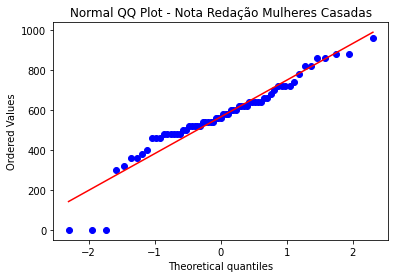

In [53]:
stats.probplot(mulheres_casadas ['NU_NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('Normal QQ Plot - Nota Redação Mulheres Casadas')
plt.show()

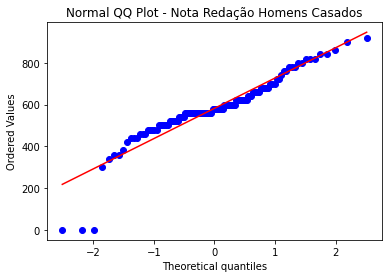

In [54]:
stats.probplot(homens_casados['NU_NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('Normal QQ Plot - Nota Redação Homens Casados')
plt.show()

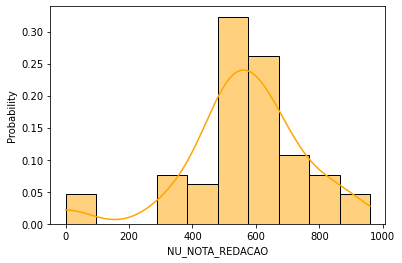

In [55]:
sns.histplot(mulheres_casadas, x='NU_NOTA_REDACAO', bins=10, color='orange', kde=True, stat='probability')

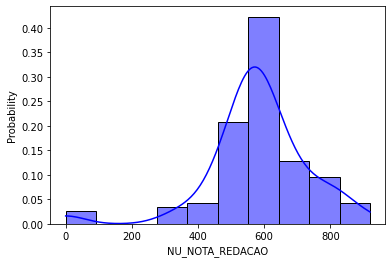

In [56]:
sns.histplot(homens_casados, x='NU_NOTA_REDACAO', bins=10, color='blue', kde=True, stat='probability')

In [57]:
stat, p = stats.mannwhitneyu(mulheres_casadas.NU_NOTA_REDACAO, homens_casados.NU_NOTA_REDACAO)
print('Estatística do Teste: {}:'.format(stat.round(2)))
print('p-valor:{}'.format(p))

Estatística do Teste: 3558.5:
p-valor:0.5318539961770496


Conclusão: Considerando o intervalo de confiança de 95%, não podemos concluir que exista diferença entre as medianas das notas de redação entre mulheres casadas e homens casados. Não rejeita H0.